In [19]:
from sklearn import cross_validation, datasets, metrics, neighbors 
import numpy as np
from matplotlib.colors import ListedColormap

In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h3>Генерируем выборку из 100 элементов с двумя признаками из 3 классов</h3>

In [77]:
classification_problem = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, 
                                                      n_classes=3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

<h3>Визуализация выборки</h3>

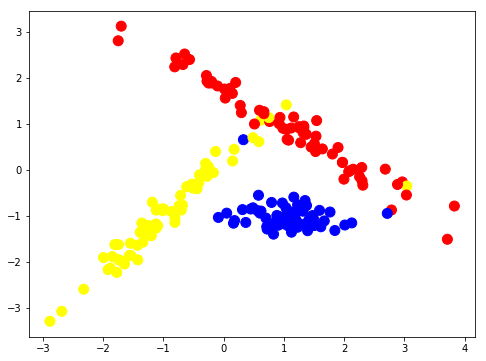

In [78]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)

#### Выделим 70% выборки под обучение и 30% будут отложенной выборкой

In [79]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель KNeighborsClassifier

In [80]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Качество прогнозов

In [81]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.96666666666666667

### Разделяющая поверхность

In [82]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [83]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    accuracy = metrics.accuracy_score(test_labels, estimator.predict(test_data))
    pyplot.title('Test data, accuracy={:.2f}'.format(accuracy))
    return accuracy

0.94999999999999996

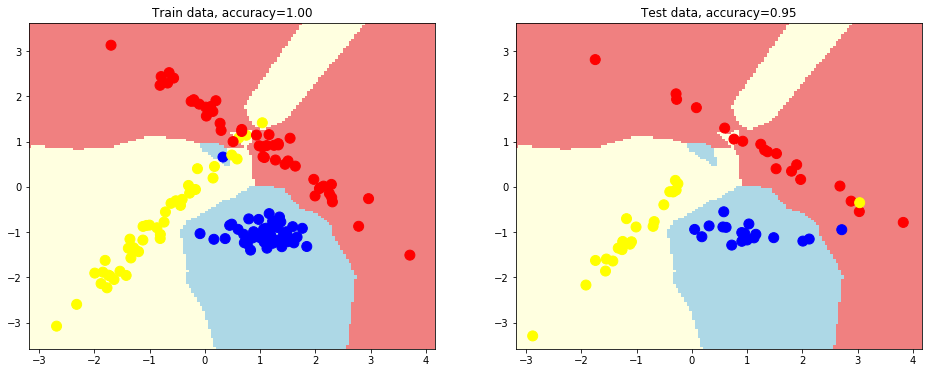

In [84]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

0.96666666666666667

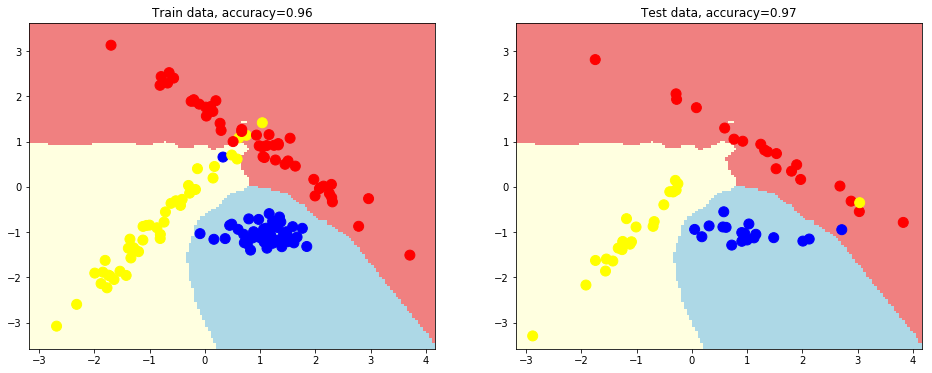

In [85]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

0.96666666666666667

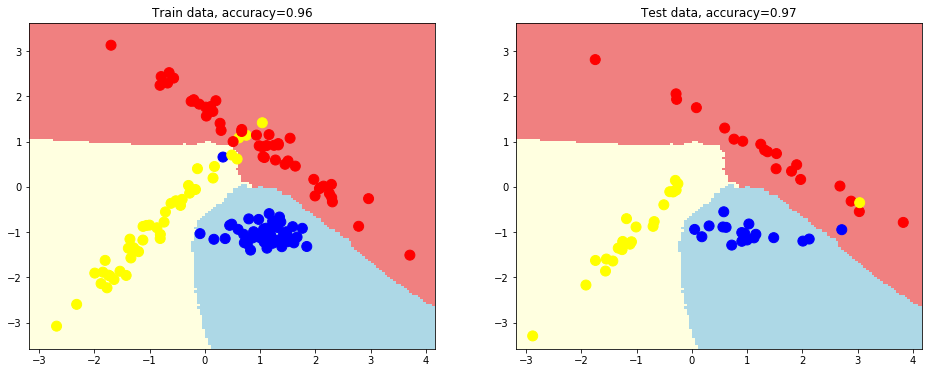

In [86]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

0.91666666666666663

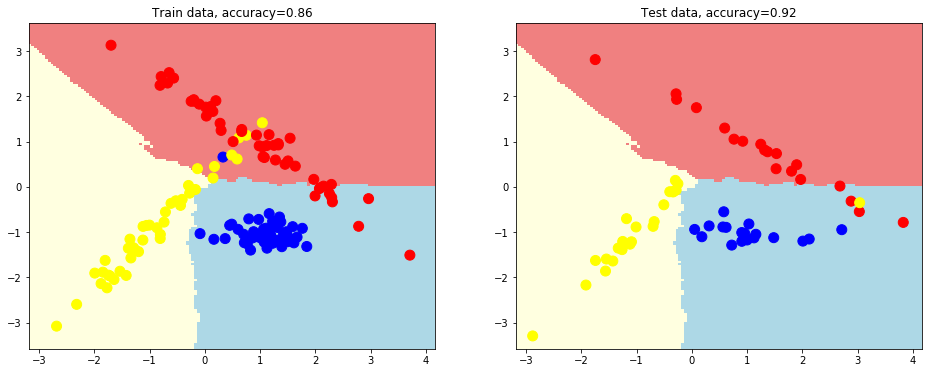

In [87]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=50)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

### График зависимости accuracy от k

In [90]:
accuracy_arr = []
n_neighbors_arr = []
for i in range(1, 100):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=i)
    estimator.fit(train_data, train_labels)
    predictions = estimator.predict(test_data)
    accuracy_arr.append(metrics.accuracy_score(test_labels, predictions))
    n_neighbors_arr.append(i)

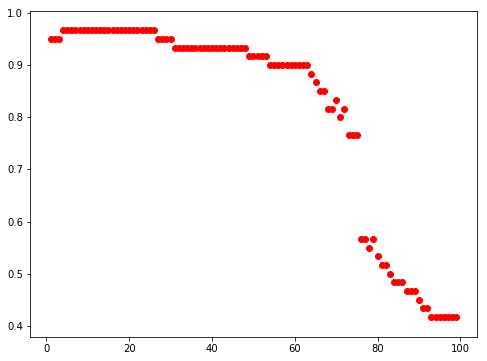

In [105]:
pylab.figure(figsize=(8,6))
pylab.scatter(n_neighbors_arr, accuracy_arr, c='r')

#### Видно, что лучшая точность достигается при не слишком больших значениях K